# Generative Models PHW1

Name: Sajjad_Heidarinezhad

Student ID: 402201293

سلام. علاوه بر این فایل، برای پاسخ به سوالات عملی دوم، من در یک فایل نوت بوک دیگر، به طور کامل ، با روش خود، سوال عملی دوم را پیاده سازی کردم و به سوالات داده شده پاسخ دادم. یعنی هم این فایل و هم یک فایل دیگر که به همراه بقیه ی فایل ها ارسال کرده ام را نیز در نظر بگیرید. با تشکر.


In [43]:
# Import necessary libraries
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
import scipy.io as sio

# Markov Random Field (10 points)

Consider a 2D image made of binary pixels. Now, suppose you have a noisy version of this image where each pixel has a 0.1 probability of flipping its value. In the figure below, a sample real and noisy image is displayed. In this problem, the goal is to recover the original image by observing the noisy image using a Markov random field.
The energy function of the network on this set of variables is defined as follows:
$$E=\alpha \sum_i  x_i  -\beta \sum_{i,j}x_{i}x_{j} -\gamma \sum_i x_i y_i$$

where the parameters need to be tuned. Based on the image provided in the file `HW1_image.mat`, you must find the real value of each pixel based on its noisy counterpart shown in the file.
To do this, find the optimal value for the above energy function. First, initialize the real pixel values (i.e., $x_i$) with their noisy values given in the file. Then, sequentially check if assigning the value +1 or -1 to each pixel decreases the energy function. Repeat this process until the energy function converges.
- Display the recovered image and report the numeric value of your accuracy.
- Discuss the effect of increasing or decreasing each of the three model parameters and for one of the parameters, demonstrate this effect by changing it and recovering the image again.
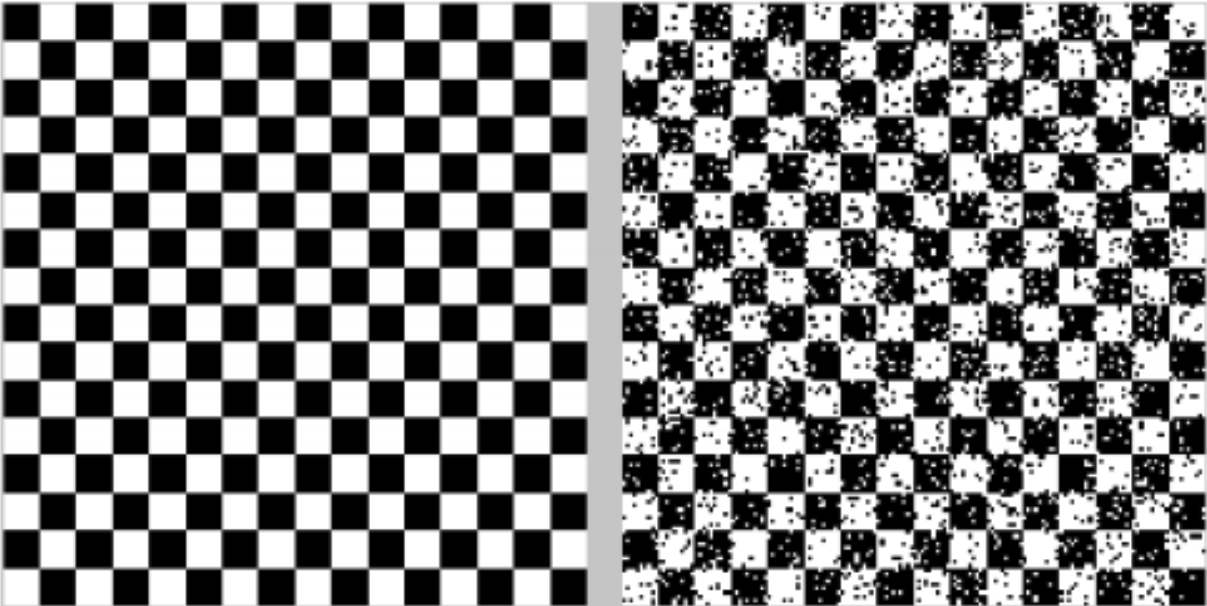

In [44]:

class MarkovRandomFieldDenoising:
    def __init__(self, image_file):
        self.load_data(image_file)
        self.initialize_parameters()

    def load_data(self, image_file):
        data = sio.loadmat(image_file)
        self.noisy_image = data['noisy_image'].astype(np.int8) * 2 - 1
        self.true_image = data['original_image'].astype(np.int8) * 2 - 1

    def initialize_parameters(self):
        self.alpha = 0.1
        self.beta = 0.9
        self.gamma = 1.0

    def calculate_difference(self, xi, i, j, image):
        neighbors = [
            (i-1, j), (i+1, j),
            (i, j-1), (i, j+1)
        ]

        interaction_sum = 0
        for ni, nj in neighbors:
            if 0 <= ni < image.shape[0] and 0 <= nj < image.shape[1]:
                interaction_sum += image[ni, nj]

        delta_energy = -2 * (
            self.beta * xi * interaction_sum +
            self.gamma * xi * self.noisy_image[i, j] -
            self.alpha * xi
        )
        return delta_energy

    def denoise_image(self):
        denoised_image = np.copy(self.noisy_image)
        converged = False

        while not converged:
            converged = True
            for i in range(denoised_image.shape[0]):
                for j in range(denoised_image.shape[1]):
                    xi = denoised_image[i, j]

                    delta_energy = self.calculate_difference(-xi, i, j, denoised_image)

                    if delta_energy < 0:
                        denoised_image[i, j] = -xi
                        converged = False

        return denoised_image

    def compute_accuracy(self, denoised_image):
        return np.mean(denoised_image == self.true_image)

    def plot_images(self, denoised_image):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Noisy Image')
        plt.imshow(self.noisy_image, cmap='gray')
        plt.subplot(1, 3, 2)
        plt.title('True Image')
        plt.imshow(self.true_image, cmap='gray')
        plt.subplot(1, 3, 3)
        plt.title('Denoised Image')
        plt.imshow(denoised_image, cmap='gray')
        plt.show()



Accuracy: 0.9828125


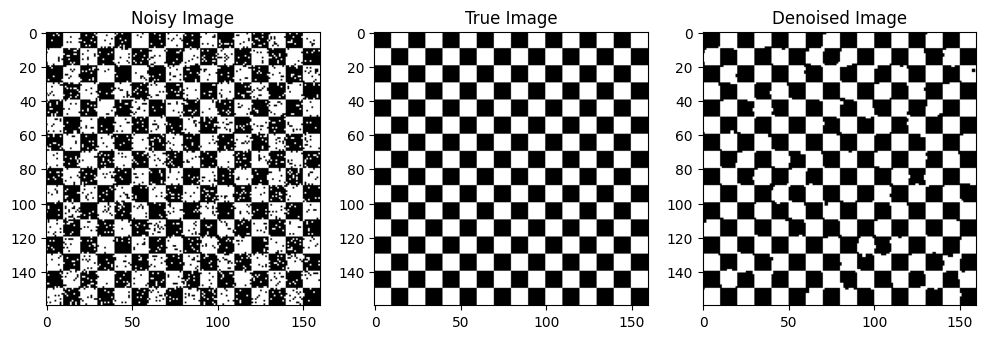

In [45]:
mrf_denoising = MarkovRandomFieldDenoising('HW1_image.mat')

denoised_image = mrf_denoising.denoise_image()

accuracy = mrf_denoising.compute_accuracy(denoised_image)
print(f"Accuracy: {accuracy}")

mrf_denoising.plot_images(denoised_image)

# TODO: Discuss the effect of parameter changes and demonstrate with one parameter
#Alpha (α):
#    Role: Typically balances the contribution of individual pixel biases.
#    Effect:
#        If increases: Places more emphasis on individual pixels retaining their identity, resisting change.
#        If decreases: Less resistance to change, allowing the influence from neighboring pixels or noisy observations to dominate.

#Beta (β):
#    Role: Determines the strength of smoothness or consistency encouraged among neighboring pixels.
#    Effect:
#        If increases: Stronger tendency for neighboring pixels to share similar values, enhancing smooth regions and suppressing noise.
#        If decreases: Weaker inter-pixel influence, potentially preserving more detail but allowing noise to persist.

#Gamma (γ):
#    Role: Controls reliance on the observed (noisy) image.
#    Effect:
#        If increases: The model is more anchored to the noisy input, resisting deviations based on prior expectations or smoothness.
#        If decreases: Reduces adherence to noisy observations in favor of smoother or prior-influenced interpretations.

Change in beta parameter to check in the output result

Accuracy with increased beta (strong smoothing): 0.98


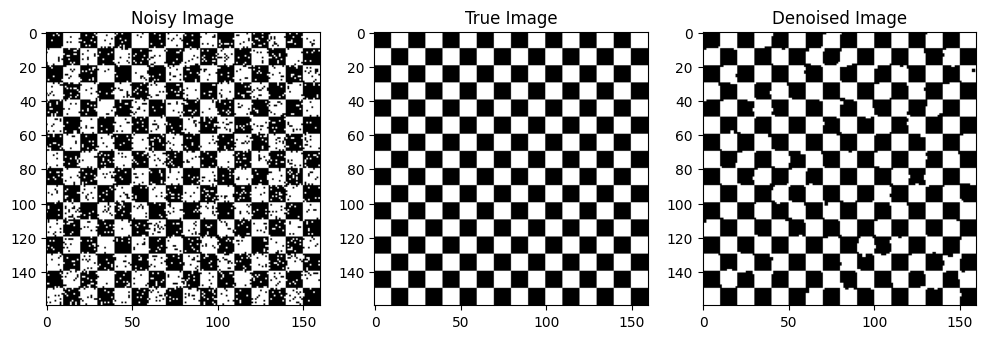

In [46]:
#Increase beta to emphases smoothness
mrf_denoising.beta = 10.0
denoised_image_strong_smooth = mrf_denoising.denoise_image()
accuracy_strong_smooth = mrf_denoising.compute_accuracy(denoised_image_strong_smooth)

print(f'Accuracy with increased beta (strong smoothing): {accuracy_strong_smooth:.2f}')
mrf_denoising.plot_images(denoised_image_strong_smooth)


Accuracy with decreased beta (weak smoothing): 0.96


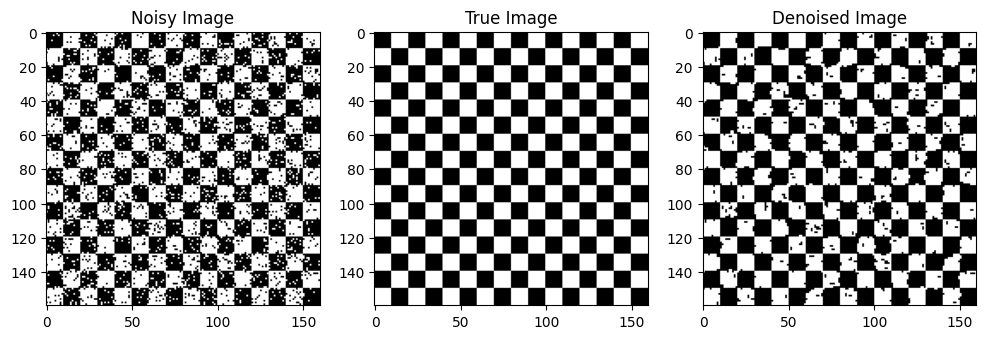

In [47]:
# Decrease beta to reduce smoothness emphasis
mrf_denoising.beta = 0.5
denoised_image_weak_smooth = mrf_denoising.denoise_image()
accuracy_weak_smooth = mrf_denoising.compute_accuracy(denoised_image_weak_smooth)

print(f'Accuracy with decreased beta (weak smoothing): {accuracy_weak_smooth:.2f}')
mrf_denoising.plot_images(denoised_image_weak_smooth)


Accuracy: 0.9831640625

The effect of parameter changes:

    Alpha (α):
        Role: Typically balances the contribution of individual pixel biases.
        Effect:
            If increases: Places more emphasis on individual pixels retaining their identity, resisting change.
            If decreases: Less resistance to change, allowing the influence from neighboring pixels or noisy observations to dominate.

    Beta (β):
        Role: Determines the strength of smoothness or consistency encouraged among neighboring pixels.
        Effect:
            If increases: Stronger tendency for neighboring pixels to share similar values, enhancing smooth regions and suppressing noise.
            If decreases: Weaker inter-pixel influence, potentially preserving more detail but allowing noise to persist.

    Gamma (γ):
        Role: Controls reliance on the observed (noisy) image.
        Effect:
            If increases: The model is more anchored to the noisy input, resisting deviations based on prior expectations or smoothness.
            If decreases: Reduces adherence to noisy observations in favor of smoother or prior-influenced interpretations.


# Bayesian Network (15 points)

Here we want to implement a Bayesian Network from scratch. The instructions are as follows:

1. `__init__` method:
  - Create a directed acyclic graph (DAG) using `networkx.DiGraph()`.
  - Set up an empty dictionary cpts to store the Conditional Probability Tables (CPTs) for each node.

2. `add_node` method:
	- Use `self.graph.add_node(node)` to add a node to the network graph.

3. `add_edge` method:
  - Use `self.graph.add_edge(parent, child)` to create a directed edge from the parent to the child node.

4. `set_cpt` method:
  - Assign the cpt (which is a dictionary) to the node in `self.cpts[node]`.

5. `draw_network` method:
	-	Use `nx.spring_layout(self.graph)` to arrange the nodes.
	-	Use `nx.draw()` to plot the nodes and edges with labels, and customize the layout.
	-	Display the network using `plt.show()`.

6. `joint_probability` method:
	-	For each node, get its value from `values[node]` and its parents using `self.graph.predecessors(node)`.
	-	If a node has no parents (a root node), multiply the probability from the node's CPT.
	-	If a node has parents, get the parent values, and multiply the conditional probability from its CPT.

7. `compute_posterior` method:
	-	Identify hidden nodes (those not in the query or evidence).
	-	Compute the denominator by summing the joint probability over all possible values of hidden nodes.
	-	Compute the numerator by summing the joint probability of the query and evidence over all hidden values.
	-	Return the ratio of numerator to denominator.

8. `variable_elimination` method:
	-	Initialize factors using `_initialize_factors()`, reducing the CPTs based on evidence.
	-	Identify the nodes to eliminate (all nodes except the query and evidence).
	-	Eliminate each variable by summing it out with `_sum_out()`.
	-	Multiply the remaining factors and normalize to get the final distribution.

9. `_initialize_factors` method:
	-	For each node, get its CPT from `self.cpts`.
	-	If the node has evidence, reduce the CPT using `_reduce_factor()`.
	-	Otherwise, include the CPT unchanged.

10. `_reduce_factor` method:
  - If the node has no parents, just return the CPT for the observed value.
	- If the node has parents, keep only the relevant rows from the CPT based on the observed value.

11. `_sum_out` method:
	-	Find factors that include the variable.
	-	Multiply those factors together.
	-	Use `_sum_out_factor()` to sum out the variable from the combined factor.

12. `_sum_out_factor` method:
	-	For each assignment of the variable, sum over the values where the variable appears.
	-	Create a new factor that does not include the variable.

13. `_multiply_factors` method:
	-	Start with the first factor.
	-	Multiply it with the next factor using `_multiply_two_factors()`, and continue multiplying the remaining factors.

14. `_multiply_two_factors` method:
	-	Combine each pair of assignments from both factors.
	-	Multiply the corresponding probabilities, and return the new combined factor.

15. `_normalize` method:
	-	Compute the sum of all values in the factor.
	-	Divide each value by the total to ensure the probabilities sum to 1.

In [50]:
class BayesianNetwork:
    def __init__(self):
        """Initialize the Bayesian network as a directed acyclic graph (DAG)"""
        self.graph = nx.DiGraph()
        self.cpts = {}

    def add_node(self, node):
        """Add a node to the network"""
        self.graph.add_node(node)

    def add_edge(self, parent, child):
        """Add a directed edge from parent to child"""
        self.graph.add_edge(parent, child)

    def set_cpt(self, node, cpt):
        """Set the conditional probability table for a node"""
        self.cpts[node] = cpt

    def draw_network(self):
        """Draw the Bayesian network using networkx"""
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_weight='bold')
        plt.title("Bayesian Network Structure")
        plt.show()

    def joint_probability(self, values):
      """Compute the joint probability P(values) for a set of node values."""
      prob = 1.0
      for node in self.graph.nodes():
          node_value = values.get(node, None)
          parents = list(self.graph.predecessors(node))
          if node_value is None:
              continue

          if not parents:
              prob *= self.cpts[node][node_value]
          else:
              parent_values = tuple(values[parent] for parent in parents)
              prob *= self.cpts[node].get(parent_values, {}).get(node_value, 0)

      return prob


    def compute_posterior(self, query, evidence):
      """Compute the posterior probability P(query | evidence)."""
      hidden_nodes = set(self.graph.nodes()) - set(query) - set(evidence.keys())

      def enumerate_all(variables, current_assign):
          if not variables:
              return self.joint_probability(current_assign)
          first = variables[0]
          rest = variables[1:]
          total_prob = 0.0
          for value in (0, 1):
              current_assign[first] = value
              total_prob += enumerate_all(rest, current_assign)

          return total_prob

      assignment = evidence.copy()

      assignment.update(query)
      numerator = enumerate_all(list(hidden_nodes), assignment.copy())
      denominator = enumerate_all(list(hidden_nodes.union(query.keys())), evidence.copy())
      return numerator / denominator if denominator else 0.0


    def variable_elimination(self, query, evidence):
        """Perform exact inference using variable elimination."""
        factors = self._initialize_factors(evidence)
        to_eliminate = set(self.cpts.keys()) - set(query) - set(evidence.keys())
        for variable in to_eliminate:
            factors = self._sum_out(variable, factors)
        result = self._multiply_factors(factors)
        return self._normalize(result)

    def _initialize_factors(self, evidence):
        """Initialize factors, incorporating evidence."""
        factors = []
        for node, cpt in self.cpts.items():
            if node in evidence:
                factor = self._reduce_factor(cpt, node, evidence[node], list(self.graph.predecessors(node)))
            else:
                factor = cpt.copy()
            factors.append(factor)
        return factors

    def _reduce_factor(self, cpt, node, value, parents):
        """Reduce the factor (CPT) based on evidence."""
        if not parents:
            return {value: cpt[value]}
        else:
            reduced_cpt = {}
            for parent_vals, probabilities in cpt.items():
                if probabilities.get(value) is not None:
                    reduced_cpt[parent_vals] = {value: probabilities[value]}
            return reduced_cpt

    def _sum_out(self, var, factors):
        """Sum out the variable from the list of factors."""
        related_factors = [factor for factor in factors if any(var in assignment for assignment in factor)]
        remaining_factors = [factor for factor in factors if all(var not in assignment for assignment in factor)]
        combined_factor = self._multiply_factors(related_factors)
        summed_out_factor = self._sum_out_factor(combined_factor, var)

        return remaining_factors + [summed_out_factor]

    def _sum_out_factor(self, factor, var):
        """Sum out a variable from a factor."""
        new_factor = defaultdict(float)
        for assignment, prob in factor.items():
            new_assignment = {k: v for k, v in assignment.items() if k != var}
            new_assign_tuple = tuple(new_assignment.items())
            new_factor[new_assign_tuple] += prob
        return new_factor

    def _multiply_factors(self, factors):
        """Multiply a list of factors."""
        if not factors:
            return {}
        product_factor = factors[0]
        for factor in factors[1:]:
            product_factor = self._multiply_two_factors(product_factor, factor)

        return product_factor

    def _multiply_two_factors(self, factor1, factor2):
        """Multiply two factors."""
        new_factor = defaultdict(float)
        for assign1, prob1 in factor1.items():
            for assign2, prob2 in factor2.items():
                full_assignment = dict(assign1)
                full_assignment.update(assign2)
                new_assignment = tuple(full_assignment.items())
                new_factor[new_assignment] += prob1 * prob2
        return new_factor

    def _normalize(self, factor):
        """Normalize a factor to get a probability distribution."""
        total = sum(factor.values())
        if total > 0.0:
            return {k: v / total for k, v in factor.items()}
        else:
            return factor

    def calculate_conditional_probability(self, i, value, sample):
        """Calculates the conditional probability P(Xi = value | X_rest = sample_rest)."""
        node = list(self.graph.nodes())[i]
        parents = list(self.graph.predecessors(node))
        if not parents:
            return self.prior_probabilities[node][value]
        parent_values = tuple(sample[self.node_map[p]] for p in parents)

        return self.conditional_probability_tables[node][parent_values][value]



## Example
Here you must implement the following network using the `BayesianNetwork()` class you wrote:

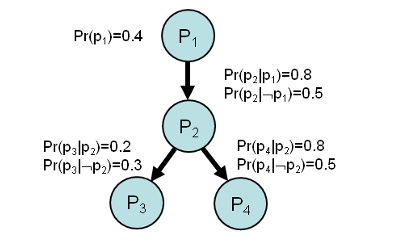

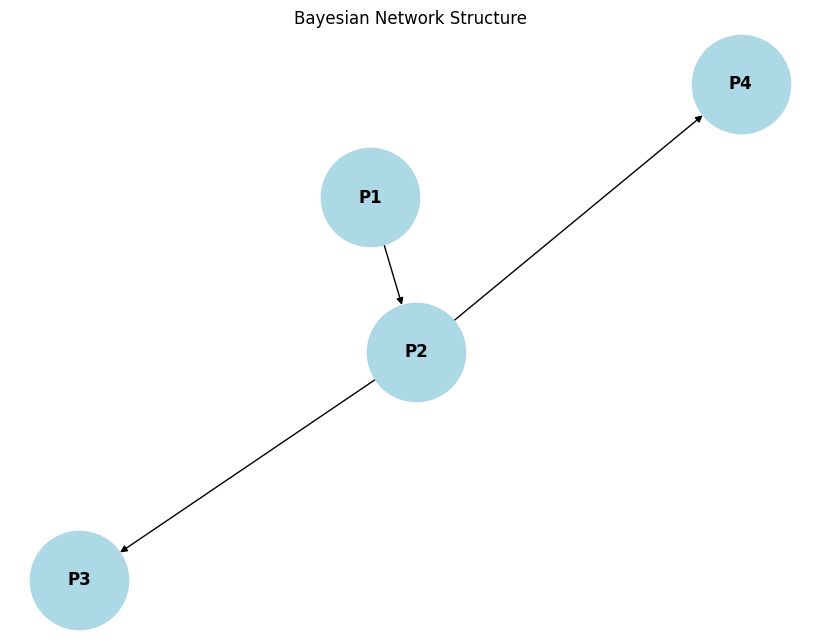

In [51]:
#Instantiate the Bayesian Network
bn = BayesianNetwork()

#Add nodes to the network
bn.add_node('P1')
bn.add_node('P2')
bn.add_node('P3')
bn.add_node('P4')

#Add edges to the network based on the given structure
bn.add_edge('P1', 'P2')  # P1 is the parent of P2
bn.add_edge('P2', 'P3')  # P2 is the parent of P3
bn.add_edge('P2', 'P4')  # P2 is the parent of P4

#Visualize the network structure
bn.draw_network()


Now fill in the Conditional Probability Tables (CPTs).

In [52]:
#Define the CPTs for each node
#P1 has no parents, so its CPT is straightforward
P1 = {
    0: 0.6,  # Pr(P1=0) = 1 - Pr(P1=1) = 0.6
    1: 0.4   # Pr(P1=1) = 0.4
}

#P2 is dependent on P1
P2 = {
    (0,): {0: 0.5, 1: 0.5},  #Pr(P2 =0| P1=0) = 0.5, Pr(P2=1| P1 =0) = 0.5
    (1,): {0: 0.2, 1: 0.8}   #Pr(P2=0 | P1=1) = 0.2, Pr(P2=1 | P1=1) = 0.8
}

#P3 is dependent on P2
P3 = {
    (0,): {0: 0.7, 1: 0.3},  #Pr(P3 =0|P2=0) = 0.7, Pr(P3=1 |P2=0) =0.3
    (1,): {0: 0.8, 1: 0.2}   #Pr(P3=0|P2=1) = 0.8, Pr(P3=1 | P2=1) = 0.2
}

#P4 is dependent on P2
P4 = {
    (0,): {0: 0.5, 1: 0.5},  #Pr(P4 =0|P2=0) = 0.5, Pr(P4=1| P2=0) = 0.5
    (1,): {0: 0.2, 1: 0.8}   #Pr(P4=0 |P2=1) = 0.2, Pr(P4=1| P2=1) = 0.8
}

#Set the CPTs for each node in the network
bn.set_cpt('P1', P1)
bn.set_cpt('P2', P2)
bn.set_cpt('P3', P3)
bn.set_cpt('P4', P4)


### Question 1

Calculate $Pr(p_1 , p_2, \neg p_3, p_4)$ by using the `joing_probability(values)` method.

In [53]:
values = {'P1': 1, 'P2': 1, 'P3': 0, 'P4': 1}
jp = bn.joint_probability(values)
print(f"P{values} = {jp:.4f}")

P{'P1': 1, 'P2': 1, 'P3': 0, 'P4': 1} = 0.2048


### Question 2

Calculate $Pr(p_2, \neg p_3)$ by using the `compute_posterior(query, evidence)` method.

In [54]:
query = {'P2': 1, 'P3': 0}
evidence = {}
posterior = bn.compute_posterior(query, evidence)
print(f'P({query}) = {posterior:.3f}')

P({'P2': 1, 'P3': 0}) = 0.496


### Question 3
Calculate $Pr(p_1 | p_2, \neg p_3)$ by using the `compute_posterior(query, evidence)` method.

In [55]:
# Example: Compute the posterior for a query and evidence pair
query = {'P1': 1}
evidence = {'P2': 1, 'P3': 0}
posterior = bn.compute_posterior(query, evidence)
print(f'P({query} | {evidence}) = {posterior:.3f}')

P({'P1': 1} | {'P2': 1, 'P3': 0}) = 0.516


## Sampling

### Rejection Sampling

In [56]:
from collections import Counter

def sample_from_cpt(cpt, parent_values=()):
    """Sample a value from a CPT given parent values (if any)."""
    if not parent_values:
        return np.random.choice(list(cpt.keys()), p=list(cpt.values()))
    else:
        distribution = cpt[parent_values]
        return np.random.choice(list(distribution.keys()), p=list(distribution.values()))

def rejection_sampling(bn, query, evidence, num_samples):
    """Rejection sampling for the given Bayesian network."""

    query_and_evidence_count = Counter()
    evidence_count = 0

    for _ in range(num_samples):
        sample = {}
        valid_sample = True
        for node in nx.topological_sort(bn.graph):
            parents = list(bn.graph.predecessors(node))
            parent_values = tuple(sample[parent] for parent in parents)
            sample[node] = sample_from_cpt(bn.cpts[node], parent_values)

            if node in evidence and sample[node] != evidence[node]:
                valid_sample = False
                break
        if valid_sample:
            evidence_count += 1
            query_values = tuple(sample[q_node] for q_node in sorted(query.keys()))
            query_and_evidence_count[query_values] += all(sample[q_node] == q_value for q_node, q_value in query.items())

    query_values = tuple(query[q_node] for q_node in sorted(query.keys()))
    probability = query_and_evidence_count[query_values] / evidence_count if evidence_count > 0 else 0

    print(f"Total Accepted Samples: {evidence_count}")

    return probability


query = {'P1': 1}
evidence = {'P2': 1, 'P3': 0}
num_samples = 10000
posterior_prob = rejection_sampling(bn, query, evidence, num_samples)
print(f"P({query} | {evidence}) = {posterior_prob:.3f}")


Total Accepted Samples: 4908
P({'P1': 1} | {'P2': 1, 'P3': 0}) = 0.520


### Gibbs Sampling

I fully implemented the gibbs sampling and rejection sampling function with another method in another file that I sent along with the exercises. Please check that file as well.

In [57]:
def gibbs_sampling(bn, initial_sample, num_iterations):
    """Gibbs sampling for the Bayesian network."""
    sample = initial_sample.copy()
    samples = {tuple(v): 0 for v in np.ndindex(*(2 for _ in bn.graph.nodes()))}  # Initialize sample counts

    # TODO

    print(f"Samples after {num_iterations} iterations:")
    print(samples)

I fully implemented the gibbs sampling and rejection sampling function with another method in another file that I sent along with the exercises. Please check that file as well.

In [42]:
#I fully implemented the gibbs sampling and rejection sampling function with another method in another file that I sent along with the exercises. Please check that file as well.


def gibbs_sampling(bn, initial_sample, num_iterations, evidence=None):
    """Gibbs sampling for estimating probabilities in a Bayesian Network."""
    sample = initial_sample.copy()
    samples = {tuple(v): 0 for v in np.ndindex(*(2 for _ in bn.graph.nodes()))}


    if evidence:
        for var, value in evidence.items():
            sample[var] = value

    nodes = list(bn.graph.nodes())
    for i in range(num_iterations):
        for node in nodes:
            if evidence and node in evidence:
                continue

            parents = bn.get_parents(node)
            parent_values = tuple(sample[parent] for parent in parents)

            cpt = bn.get_cpt(node)
            sample[node] = sample_from_cpt(cpt, parent_values)

        samples[tuple(sample[node] for node in nodes)] += 1

    print(f"Samples after {num_iterations} iterations:")
    print(samples)
    return samples

initial_sample = {'P1': 0, 'P2': 0, 'P3': 0, 'P4': 0}
evidence = {'P2': 1, 'P3': 0}

num_iterations = 10000
samples = gibbs_sampling(bn, initial_sample, num_iterations, evidence)

p1_given_p2_p3 = sum(1 for sample in samples if sample['P1'] == 1) / num_iterations
print(f"Pr(P1=1 | P2=1, P3=0) ≈ {p1_given_p2_p3}")


AttributeError: 'BayesianNetwork' object has no attribute 'get_parents'